<a href="https://colab.research.google.com/github/Elbhnasy/Ml_Projects/blob/master/Students_Performance_in_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **0. Importing**

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Ignore any warnings that may occur
warnings.filterwarnings('ignore')

### **1. Get Setup**

In [ ]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/hasnaawael/ML-Projects/main/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Create a new column for the composite score
df["composite_score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# 2. Exploatroy Data Analysis

In [ ]:
# Print information about the DataFrame
print("Information about the DataFrame:")
df.info()

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   composite_score              1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
# Count the number of missing values in each column of the DataFrame
missing_values_count = df.isna().sum()

# Print the resulting counts
print("Number of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
composite_score                0
dtype: int64


There are no missing values in this dataset

In [ ]:
# Count the number of duplicate rows in the DataFrame
num_duplicate_rows = df.duplicated().sum()

# Print the resulting count
print("Number of duplicate rows in the DataFrame: ", num_duplicate_rows)


Number of duplicate rows in the DataFrame:  0


In [ ]:
# Generate summary statistics for the DataFrame
print("Summary statistics for the DataFrame:")
df.describe()

Summary statistics for the DataFrame:


,math score,reading score,writing score,composite_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


**Categorical Data**

In [ ]:
# Count the number of occurrences of each gender in the DataFrame
gender_counts = df['gender'].value_counts()

# Print the resulting counts
print("Gender counts:")
print(gender_counts)

Gender counts:
female    518
male      482
Name: gender, dtype: int64


In [ ]:
# Count the number of occurrences of each race/ethnicity in the DataFrame
race_counts = df['race/ethnicity'].value_counts()

# Print the resulting counts
print("Race/Ethnicity counts:")
print(race_counts)

Race/Ethnicity counts:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


In [ ]:
# Count the number of occurrences of each parental level of education in the DataFrame
parental_education_counts = df['parental level of education'].value_counts()

# Print the resulting counts
print("Parental Level of Education counts:")
print(parental_education_counts)

Parental Level of Education counts:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


In [ ]:
# Count the number of occurrences of each test preparation course in the DataFrame
test_prep_counts = df['test preparation course'].value_counts()

# Print the resulting counts
print("Test Preparation Course counts:")
print(test_prep_counts)

Test Preparation Course counts:
none         642
completed    358
Name: test preparation course, dtype: int64


In [ ]:
# # Set figure size
# plt.figure(figsize=(12, 6))

# # Plot the relationship between gender and reading score
# plt.subplot(131)
# sns.boxplot(x='gender', y='reading score', data=df)

# # Plot the relationship between gender and writing score
# plt.subplot(132)
# sns.boxplot(x='gender', y='writing score', data=df)

# # Plot the relationship between gender and math score
# plt.subplot(133)
# sns.boxplot(x='gender', y='math score', data=df)

# # Add title and labels to axes
# plt.suptitle('Gender vs. Scores')
# plt.xlabel('Gender')
# plt.ylabel('Score')

# # Display the plot
# plt.show()

In [ ]:
# # Define the column names to clip
# column_names = ['math score', 'reading score', 'writing score']

# # Clip the data between the 15th and 85th percentile of each column
# df[column_names] = df[column_names].clip(lower=df[column_names].quantile(0.15),
#                                                    upper=df[column_names].quantile(0.85),
#                                                    axis=1)

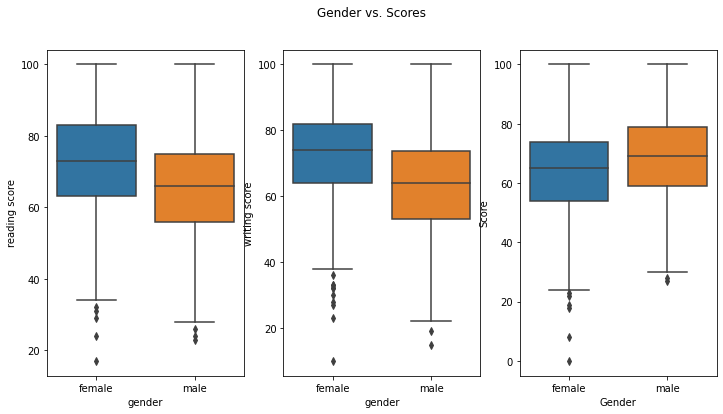

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot the relationship between gender and reading score
plt.subplot(131)
sns.boxplot(x='gender', y='reading score', data=df)

# Plot the relationship between gender and writing score
plt.subplot(132)
sns.boxplot(x='gender', y='writing score', data=df)

# Plot the relationship between gender and math score
plt.subplot(133)
sns.boxplot(x='gender', y='math score', data=df)

# Add title and labels to axes
plt.suptitle('Gender vs. Scores')
plt.xlabel('Gender')
plt.ylabel('Score')

# Display the plot
plt.show()

In [ ]:
# Generate a pie chart of race/ethnicity distribution in the DataFrame
ethnicity = df['race/ethnicity'].value_counts()
fig = px.pie(values=ethnicity.values,
             names=ethnicity.index,
             color_discrete_sequence=px.colors.sequential.Sunset,
             title="Race/Ethnicity Distribution",
             hole=0.8)
 
fig.update_traces(textinfo='label+percent', textfont_size=18)

fig.update_layout(
    font=dict(size=20, family="Arial"),
    annotations=[dict(text='Race', x=0.5, y=0.5, font_size=30, showarrow=False)]
)
fig.show()

In [ ]:
# Generate a bar chart of parental level of education distribution in the DataFrame
parent_education_counts = df['parental level of education'].value_counts()
fig = px.bar(x=parent_education_counts.index,
             y=parent_education_counts.values,
             color=parent_education_counts.index,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title="Parental Level of Education Distribution",
             labels={"x": "Education Level", "y": "Count"})

fig.update_layout(
    font=dict(size=20, family="Arial"),
    xaxis_tickangle=-45
)
fig.show()

In [ ]:
# Generate a bar chart of test preparation course distribution in the DataFrame
test_prep_counts = df['test preparation course'].value_counts()
fig = px.bar(x=test_prep_counts.index,
             y=test_prep_counts.values,
             color=test_prep_counts.index,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title="Test Preparation Course Distribution",
             labels={"x": "Test Preparation Course", "y": "Count"})

fig.update_layout(
    font=dict(size=20, family="Arial")
)
fig.show()

In [ ]:
# Generate a pie chart of race/ethnicity distribution in the DataFrame
race_counts = df['race/ethnicity'].value_counts()
fig = px.pie(values=race_counts.values,
             names=race_counts.index,
             color_discrete_sequence=px.colors.sequential.Sunset,
             title="Race/Ethnicity Distribution",
             hole=0.8)
 
fig.update_traces(textinfo='label+percent', textfont_size=18)

fig.update_layout(
    font=dict(size=20, family="Arial"),
    annotations=[dict(text='Race', x=0.5, y=0.5, font_size=30, showarrow=False)]
)
fig.show()


In [ ]:
# Generate a count plot of race/ethnicity distribution in the DataFrame
fig = px.histogram(df, x='race/ethnicity', color='race/ethnicity',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   title="Race/Ethnicity Distribution",
                   labels={"x": "Race/Ethnicity", "count": "Count"})

fig.update_layout(
    font=dict(size=20, family="Arial"),
    xaxis_tickangle=-45
)
fig.show()

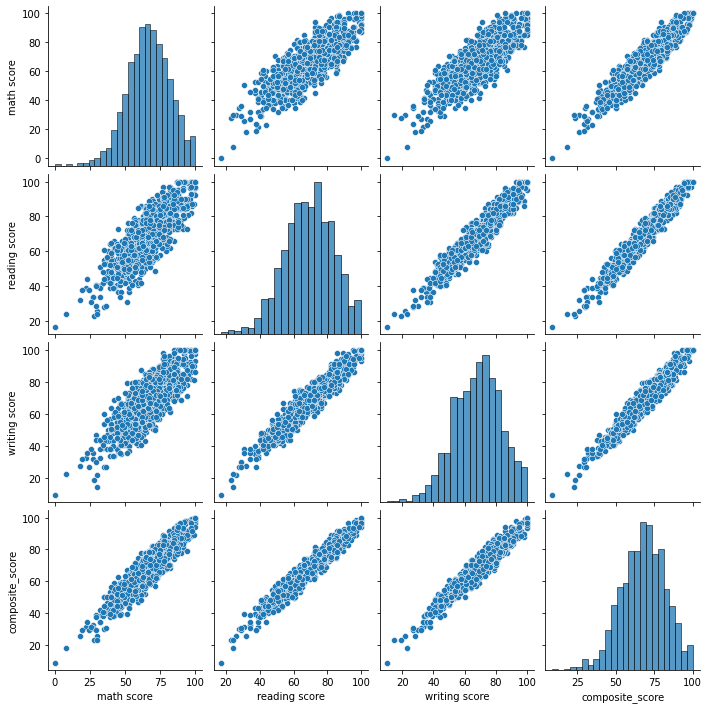

In [ ]:
# Generate a pairwise scatter plot of variables in the DataFrame
sns.pairplot(df)
plt.show()

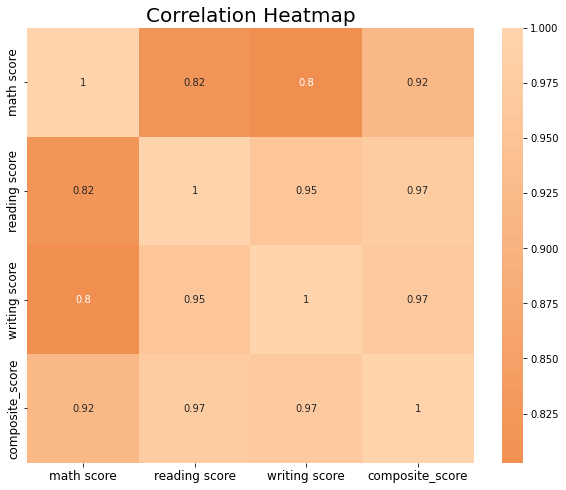

In [ ]:
# Generate a correlation heatmap of the DataFrame
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, center=0, ax=ax)

plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

The correlation coefficient between scores in the three tests is a positive correlation, which means the higher in one test is expected to have higher in the other tests.

# 3. Building Model

**Split Data**

In [ ]:
# Split the dataset into training and testing sets]
X_train, X_test, y_train, y_test = train_test_split(df.drop('composite_score', axis = 1)
                                                    , df['composite_score']
                                                    , test_size= 0.2, random_state= 42)

# Print the shapes of the training and test sets
print("Training set shape: ", X_train.shape, y_train.shape)
print("Test set shape: ", X_test.shape, y_test.shape)

Training set shape:  (800, 8) (800,)
Test set shape:  (200, 8) (200,)


**Creating Pipeline & Fitting**

In [ ]:
# Define the numerical and categorical columns
num_cols = ['reading score', 'writing score', 'math score']
cat_cols = ['gender', 'lunch', 'test preparation course', 'race/ethnicity', 'parental level of education']

# Define the preprocessor for the numerical features
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Define the preprocessor for the categorical features
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine the preprocessor for the numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Define the random forest model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.5273000000000007
Mean Squared Error: 1.3664301111111072
R-squared: 0.9936257312305801


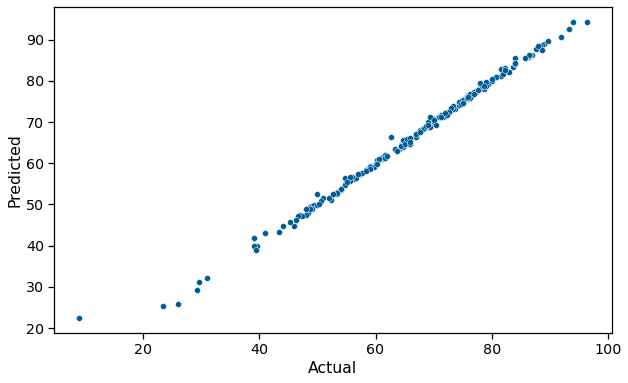

In [ ]:
# Set seaborn context and figure size
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 6))

# Create scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, color='#005b96')

# Add labels to axes
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Display the plot
plt.show()

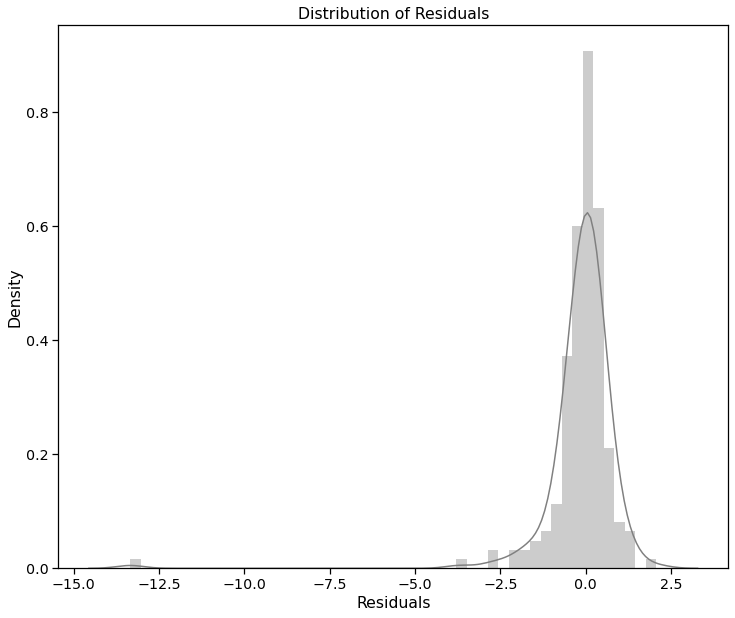

In [ ]:
# Set figure size
plt.figure(figsize=(12,10))

# Create distribution plot of residuals
sns.distplot((y_test-y_pred), bins=50, color='gray')

# Add title and labels to axes
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Display the plot
plt.show()